In [61]:
#7. Suorita GPS-anturilla vähintään muutaman minuutin mittaus, 
# jonka aikana liikut ulkona kävellen, pyöräillen, rullaluistellen tms. 
# Havaintojesi perusteella:
# a)Piirrä reitti kartalle käyttäen Folium-kirjastoa 
# b)Arvioi havaintojen luotettavuutta tarkastelemalla piirretyn reitin todenmukaisuutta. 
# c)Tarkastele datasta sateliittien määrää (toimii vain Androidilla) ja havaintojen epätarkkuutta. 
# Miten ne näkyvät karttakuvassa 
# d) Laske kuljettu matka käyttäen Haversinen kaavaa.

In [ ]:
#Ladataan data
import pandas as pd
import folium
df = pd.read_csv('./Data/GPS_data.csv')
df.head()
# a)Piirrä reitti kartalle käyttäen Folium-kirjastoa 

#Rajataan datasta pois ne rivit, joilla horinsontaalinen (epä)tarkkuus on suuri
#df = df[df['Horizontal Accuracy (m)'] <10] #Rajataan pois arvot, joissa df['Horizontal Accuracy (m)'] > 10

df = df[df['Satellites'] > 30]
df = df.reset_index(drop =True)

#Määritellään "karttapohja", eli kartan keskipiste
lat1 = df['Latitude (°)'].mean() #Latitudin keskiarvo
long1 = df['Longitude (°)'].mean() #Longitudin keskiarvo

#luodaan kartta
my_map = folium.Map(location = [lat1,long1], zoom_start=15)

#Piirretään reitti kartalle:
folium.PolyLine(df[['Latitude (°)','Longitude (°)']], color = 'red', weight = 3).add_to(my_map)
my_map.save('Kartta_19.11.2025.html')

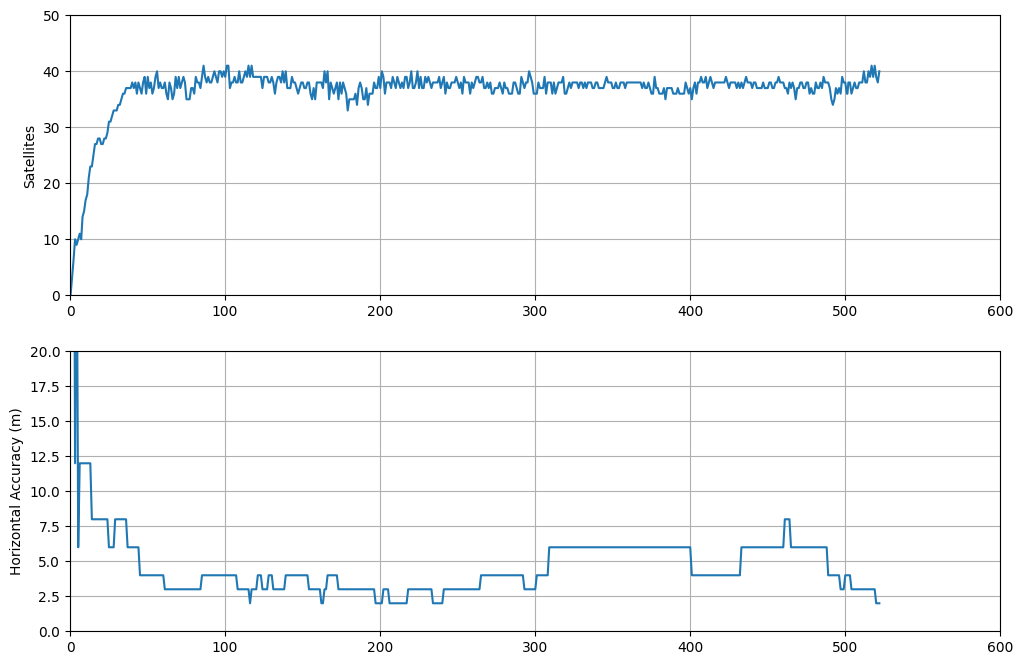

In [63]:
# c)Tarkastele datasta sateliittien määrää (toimii vain Androidilla) ja havaintojen epätarkkuutta. 
# Miten ne näkyvät karttakuvassa 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(df['Time (s)'],df['Satellites'])
plt.ylabel('Satellites')
plt.axis([0,600,0,50])
plt.grid()
plt.subplot(2,1,2)
plt.plot(df['Time (s)'],df['Horizontal Accuracy (m)'])
plt.ylabel('Horizontal Accuracy (m)')
plt.axis([0,600,0,20])
plt.grid()
#df.head()

In [64]:
# d) Laske kuljettu matka käyttäen Haversinen kaavaa.
#Lasketaan matka käyttäen Haversinen kaava
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

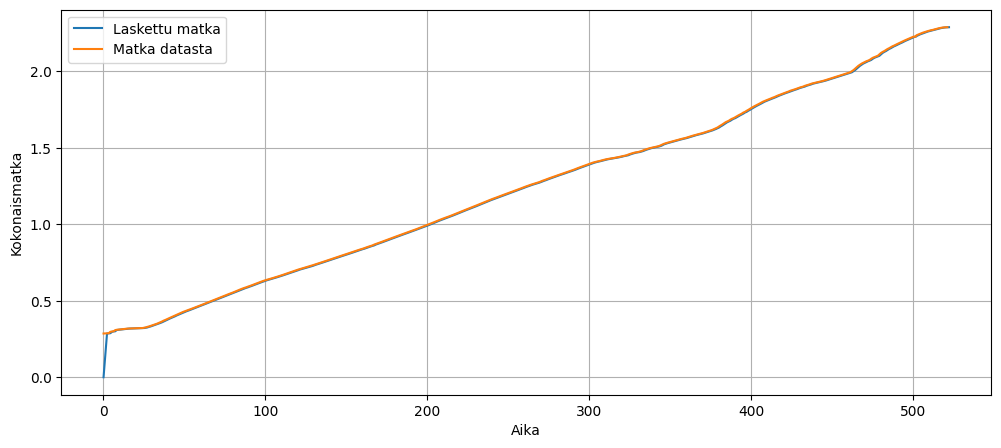

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,Distance_calc,total_distance
0,0.036471,65.057824,25.607761,NaN,NaN,NaN,NaN,0.285891,1200.0,0.000000,-1.0,0.000000,0.000000
1,2.180097,65.055387,25.605821,69.903995,87.392293,NaN,NaN,0.287163,48.0,89.325722,6.0,0.285892,0.285892
2,3.253808,65.055398,25.605811,70.860037,88.348338,1.036998,195.400040,0.287824,12.0,18.482990,10.0,0.001272,0.287163
3,4.211285,65.055392,25.605815,71.734946,89.223245,1.357963,183.259613,0.296764,32.0,60.892376,9.0,0.000661,0.287824
4,5.287567,65.055315,25.605759,46.164702,63.652976,1.364751,4.011772,0.299456,6.0,9.587370,10.0,0.008940,0.296764


In [65]:
#Lasketaan kuljettu matka
import numpy as np
df['Distance_calc'] = np.zeros(len(df))

#lasketaan väimatka havaintopisteiden välillä käyttäen For-luuppia
for i in range(len(df)-1):
    lon1 = df['Longitude (°)'][i]
    lon2 = df['Longitude (°)'][i+1]
    lat1 = df['Latitude (°)'][i]
    lat2 = df['Latitude (°)'][i+1]
    df.loc[i+1,'Distance_calc'] = haversine(lon1, lat1, lon2, lat2)

#Lasketaan kokonaismatka mittapisteiden välisestä matkasta
df['total_distance'] = df['Distance_calc'].cumsum()
plt.figure(figsize=(12,5))
plt.plot(df['Time (s)'],df['total_distance'])
plt.plot(df['Time (s)'],df['Distance (km)'])
plt.ylabel('Kokonaismatka')
plt.xlabel('Aika')
plt.legend(['Laskettu matka','Matka datasta'])
plt.grid()
plt.show()
df.head()